네트워크가 깊어질수록 연산 결과가 좋아진다는 것은 주지의 사실이지만, 이에 따라 연산량이 굉장히 늘어나게 된다.

특히 convolution layer의 영향이 심각하며, channel 수의 증가 영향이 크다..

## NIN

비선형 관계를 표현하기 위해 NIN을 사용한다. Multi Layer Perceptron(MLP)를 도입한다.

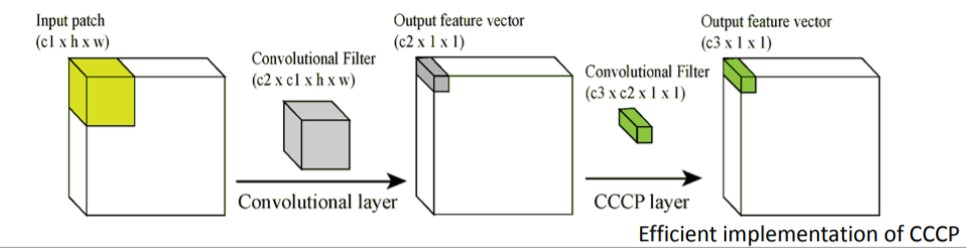

MLP는 일반적 Conv연산 후에 1x1 Conv를 도입하는 것과 같다. 채널 수를 줄여 차원감소 효과를 내는 것이다.

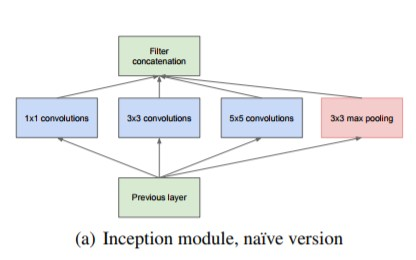

dense하면서 sparse를 확보하기 위한 절충안

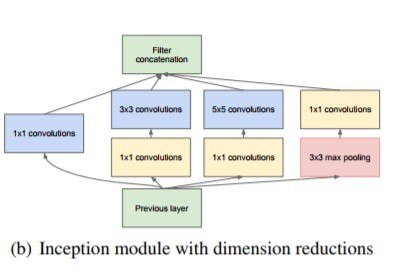

연산량이 많아서 1x1 Conv를 추가한다

이를 여러겹 쌓는 것으로 GoogLeNet을 완성한다.

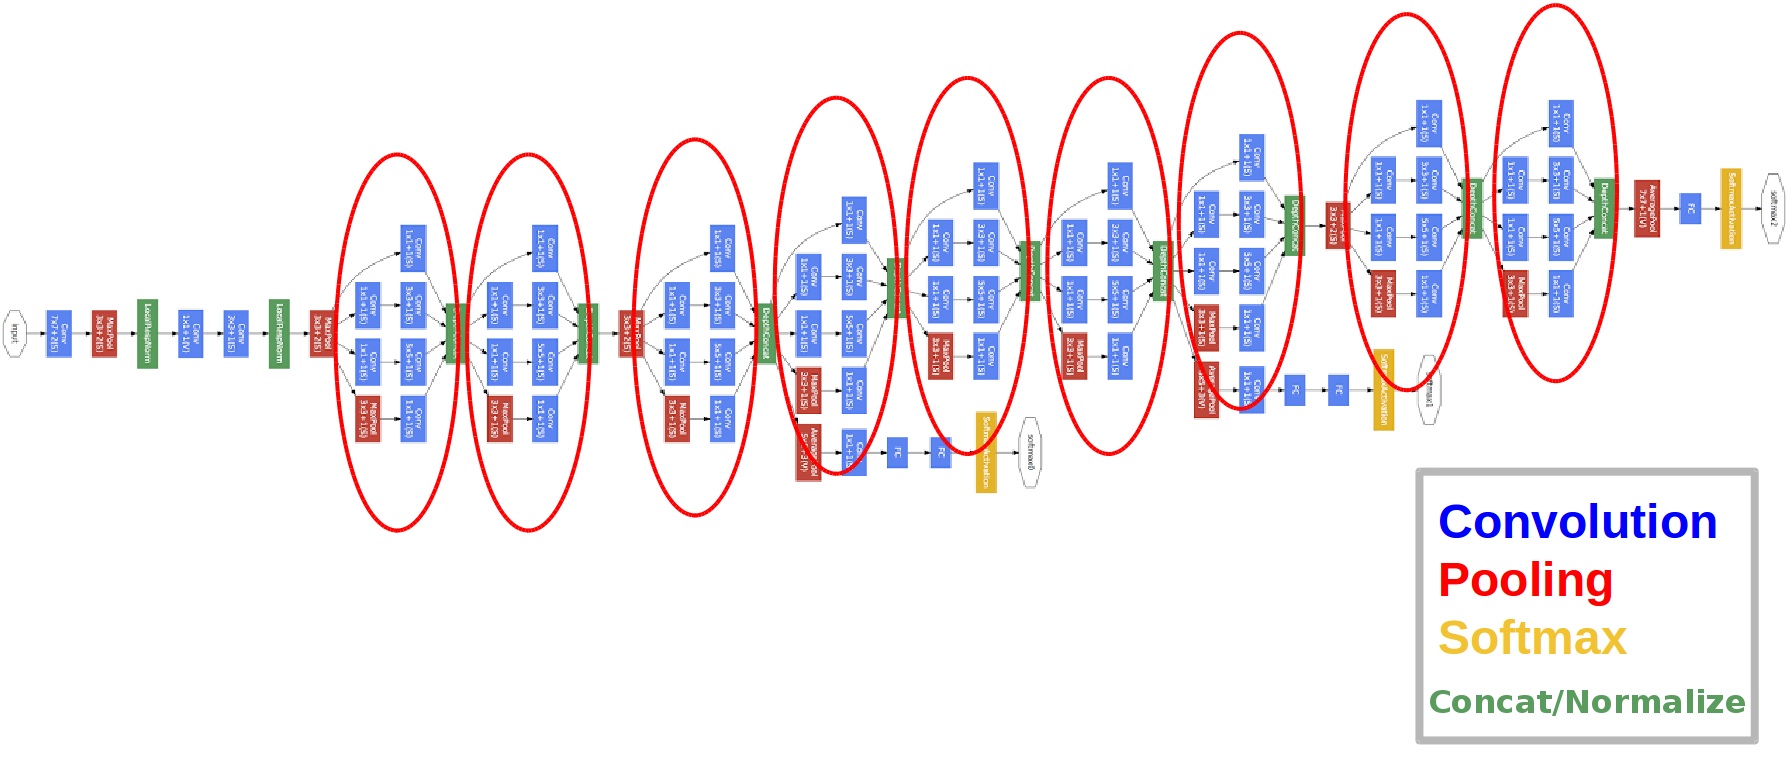

MLP는 conv layer와 fully connected layer를 쌓음으로써 이루어진다

MultiLayer Perceptron

global average pooling은 overfitting을 방지하고, fully connected layer에 비해서 dropout에 의존하지 않으며 그 자체로 그 기능을 수행한다

통상적인 CNN에서, 많은 필터는 다음 레이어에 대해서 많은 변수들의 합을 고려하게 만든다.

NIN의 두가지 핵심: 1. MLP conv layer 2. global average pooling

MLP는 좋은 approximator이다. what is approximator?

approimator로 MLP를 사용하는 이유: 1.conv와의 호환성이 좋다. 2.스스로 깊은 모델이 된다?

convolution layer는 환기장치처럼 사용되며, 최종적으로 fully coneected layer를 통과하면서 분류된다. 이 fully connected layer는 overfitting을 야기할 수 있다.

dropout으로 해결했으나, 다른 방법을 쓴다

global average pooling의 이점은 convolution layer와 관련성이 깊다는 것으로, gap에 의해 category 맵으로 쉽게 변형된다.

파라미터가 없기 때문에 오버피팅을 벗어나고, 위치 친화적인 특성을 지닌다.

Convolution 후 activation(relu), pooling을 거치는 한 단계가 convolution layer의 과정

googlenet에서의 1x1 conv는 두가지 목적을 가지고 있다.

1. 차원 감소 효과를 누리기 위함이다

2. 깊이/넓이를 페널티 없이 늘릴 수 있다

인셉션의 착안점은 sparse structure를 근사하는 것이다. 중요 착안점은 sparse한 structure를 구성하는 것.

layer-by-layer construction, cluster를 구성하여 다음 레이어로 연결되고, 이전 레이어의 유닛과 관련되어 있다. 이 유닛들이 인풋 이미지의 영역과 관계가 있고, 필터로 묶인다고 생각했다.

더 낮은 region에 있는 layer가 더 지역적인 연관성을 강하게 갖는다

## NIN Structure

GooGleNet이 갖는 가장 큰 특징은 Inception module을 통해서 신경망을 구축했다는 점인데, 이의 기초는 MLP struture를 쌓아올린 NIN(Network In Network)에서 기반하고 있다.

### MLP

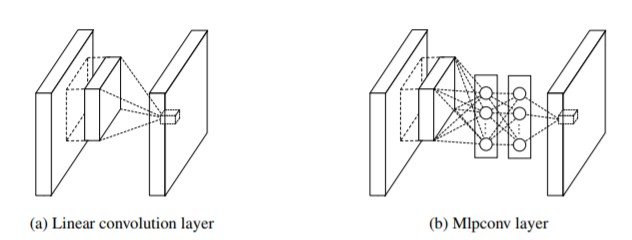

MLP(MultiLayer Perceptron)은 일반적인 CNN 연산에 fully connected layer를 추가하여 네트워크의 연산과정을 더 비선형적으로 근사하기 위해 사용된다.

이 때, MLP의 연산과정은 일반적인 네트워크의 연산과정을 축소해놓은 것과 같기 때문에 MLP를 쌓는 과정을 네트워크 속에 네트워크를 쌓는 것이라고도 볼 수 있다(NIN).

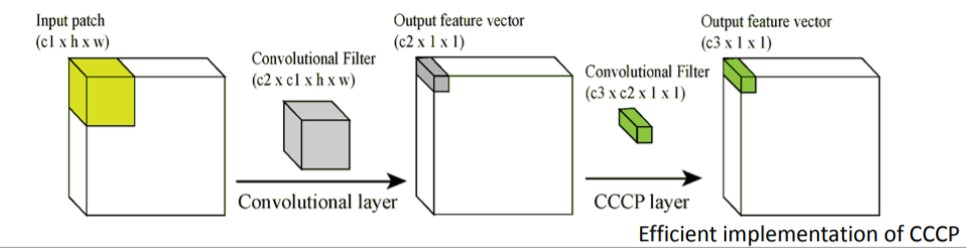

그런데 이 fully connected layer는 CCCP(Cascaded Cross Channel Pooling)와 동일하며, 또 CCCP는 1x1 convolution layer의 연산과 같기 때문에,

#### MLP의 연산은 CNN 연산에 더하여 1x1 Conv 연산을 수행하는 것과 동일하다.

### Global Average Pooling

NIN의 두 번째 특징은 classifier에 앞서서 Affine연산을 수행하지 않고 GAP를 시행한다는 것에 있다. 이에 따라 다음과 같은 이점을 얻을 수 있는데,

1. GAP의 결과는 Convolution 연산의 feature map을 그대로 따르기 때문에, category와 feature map 간 연관성을 더 깊게 해준다.

2. GAP에는 패러미터가 존재하지 않기 때문에 연산량이 감소하는 효과를 볼 수 있다.

3. Average Pooling은 공간 정보를 통해 연산하기 때문에, 공간정보의 변화에 더 민감하게 반응한다.

이러한 이점을 네트워크를 구성하는 데 이용할 수 있으며, 이 논지가 GoogLeNet에도 적용되었다.

## GoogLeNet

GoogLeNet의 기본적인 구조는 NIN을 따르고 있으며, MLP 계층을 Inception Module로 대체하고 있다.

일반적인 CNN에서 연산의 정확도를 높이기 위해서는 네트워크의 크기를 키울 필요가 있다.

네트워크를 키운다는 것은 1. 계층 깊이를 늘리는 것과, 2. 패러미터의 갯수를 크게 만드는 것을 의미한다.

그런데 네트워크를 키우는 과정은 중대한 장애물을 동반하는데, 바로

1. 많은 패러미터는 overfitting을 일으키기 쉽다는 것과

2. 계층이 깊어질수록 리소스 사용량이 급격하게 증가한다는 것에 있다.

이를 해결하기 위해서 요구되는 것은 네트워크의 구조가 sparse해아 한다는 점인데, Inception Module의 착안점이 바로 여기서 시작한다.

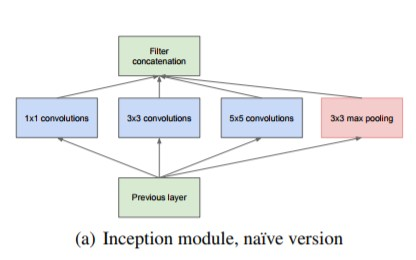

Inception Module에서는 각 input layer에 대해서 convolution 연산을 실시하는데, 이 연산 결과들이 각자 input data에 대한 공간적 연관성을 유지한 채 합쳐지고 sparse한 관계를 유지한다. (dropout의 연산과정과 비슷한 양상)

그러나 이 모델은 연산량이 굉장히 크다는 점 때문에 비효율적인데, **여기서 1x1 conv 연산을 적용한다. **

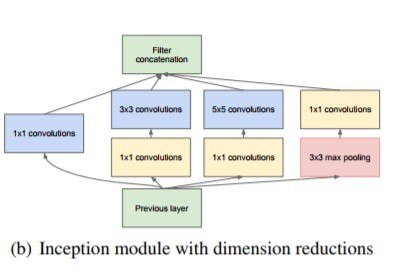

CCCP에서와 마찬가지로, 1x1 convolution 연산은 fully connecting을 유지하면서 채널의 수를 줄여주는 pooling 계층의 역할도 겸한다.

1x1 convolution 연산에서 채널 수를 줄임으로써 총 연산량이 감소하는 결과를 얻게 되는 것이다.

이제 각자 연산이 끝난 sparse한 결과들을 채널에 대한 concat연산을 통하여 다음 레이어의 input image로 만들어준다.

이 Inception Module이 GoogLeNet에서의 MLP에 해당하는 것으로, 전체 구조는 이 모듈을 겹쳐 쌓는 것으로 완성된다.

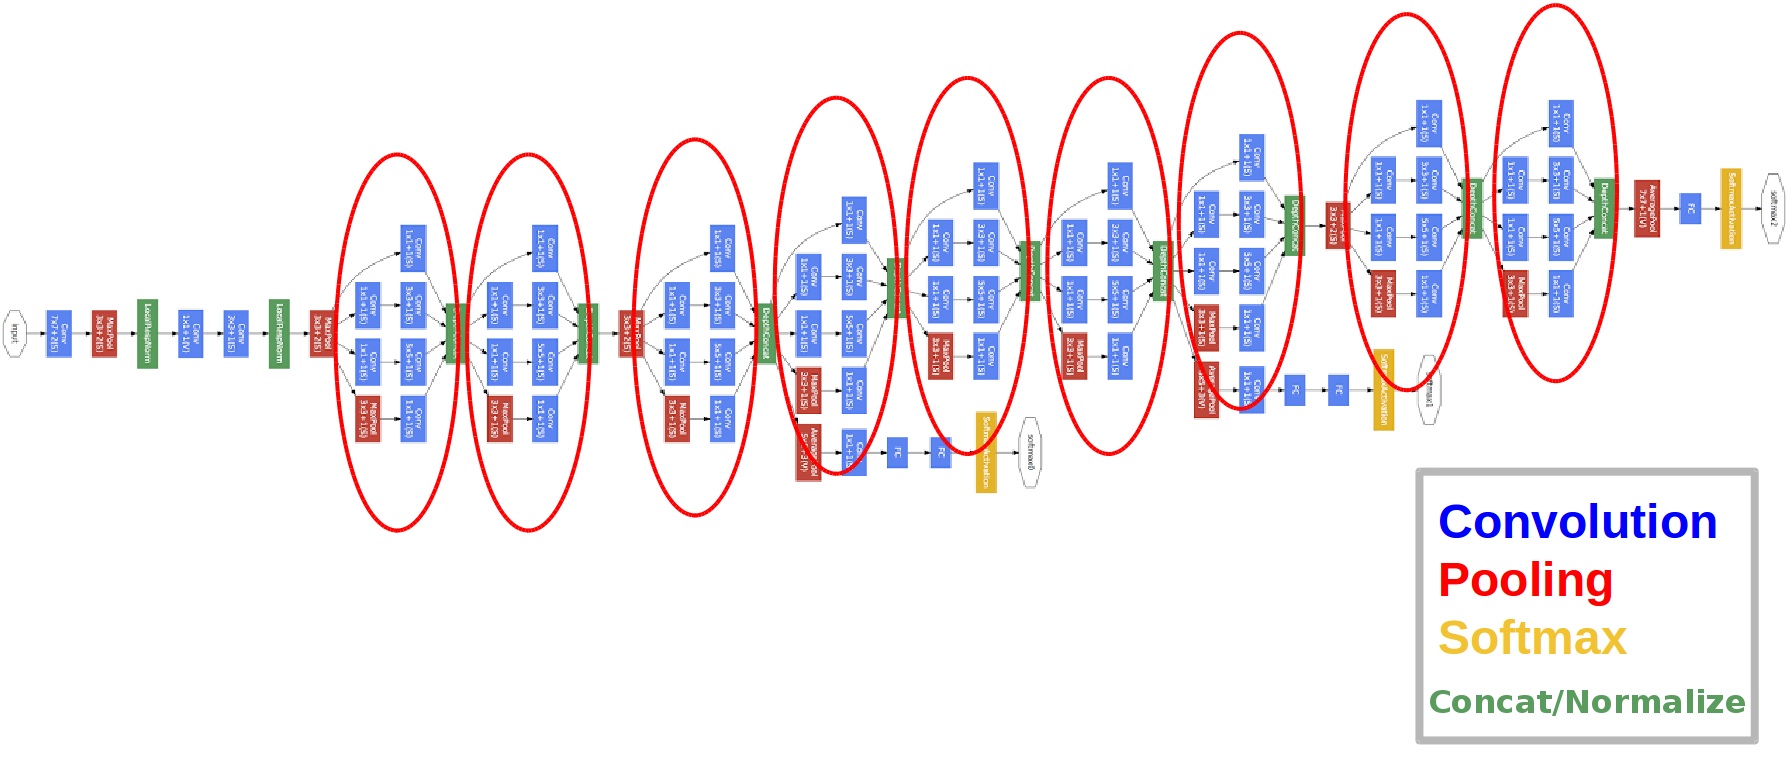

데이터 로드

In [1]:
import torch

In [2]:
import torchvision

In [3]:
import torchvision.transforms as transforms

In [4]:
import torch.nn as nn

In [5]:
import torch.nn.functional as F

In [6]:
transform = transforms.Compose(
    [transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)

Files already downloaded and verified


In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

In [9]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [10]:
testloader = torch.utils.data.DataLoader(testset,batch_size=1, shuffle=False, num_workers=2)

In [11]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

신경망 정의

In [12]:
class Inception(nn.Module):
    def __init__(self,inputs,n1x1,n3x3red,n3x3,n5x5red, n5x5, pool):
        super(Inception, self).__init__()
        
        self.b1 = nn.Sequential(
            nn.Conv2d(inputs, n1x1, 1),
            nn.BatchNorm2d(n1x1),
            nn.ReLU(True),
        )
        self.b2 = nn.Sequential(
            nn.Conv2d(inputs, n3x3red, 1),
            nn.BatchNorm2d(n3x3red),
            nn.ReLU(True),
            nn.Conv2d(n3x3red, n3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(n3x3),
            nn.ReLU(True),
        )
        self.b3 = nn.Sequential(
            nn.Conv2d(inputs, n5x5red, 1),
            nn.BatchNorm2d(n5x5red),
            nn.ReLU(True),
            nn.Conv2d(n5x5red, n5x5, kernel_size=3, padding=1),
            nn.BatchNorm2d(n5x5),
            nn.ReLU(True),
        )
        self.b4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            nn.Conv2d(inputs, pool, kernel_size=1),
            nn.BatchNorm2d(pool),
            nn.ReLU(True),
        )
        
    def forward(self, x):
        y1 = self.b1(x)
        y2 = self.b2(x)
        y3 = self.b3(x)
        y4 = self.b4(x)
        return torch.cat([y1,y2,y3,y4],1) #dimention 0: minibatch
        

In [17]:
class GoogLeNet(nn.Module):
    def __init__(self):
        super(GoogLeNet,self).__init__()
        self.stem = nn.Sequential(
        nn.Conv2d(3, 192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(True),
        )
        
        self.a3 = Inception(192, 64, 96, 128, 16, 32, 32)
        self.b3 = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)
        self.a4 = Inception(480, 192, 96, 208, 16, 48, 64)
        self.b4 = Inception(512, 160, 112, 224, 24, 64, 64)
        self.c4 = Inception(512, 128, 128, 256, 24, 64, 64)
        self.d4 = Inception(512, 112, 144, 288, 32, 64,64)
        self.e4 = Inception(528, 256, 160, 320, 32, 128, 128)
        
        self.a5 = Inception(832, 256, 160, 320, 32, 128, 128)
        self.b5 = Inception(832, 384, 192, 384, 48, 128, 128)
        
        self.avgpool = nn.AvgPool2d(8, stride=1)
        self.linear = nn.Linear(1024, 10)       
        
        
    def forward(self, x):
        out = self.stem(x)
        out = self.a3(out)
        out = self.b3(out)
        out = self.maxpool(out)
        out = self.a4(out)
        out = self.b4(out)
        out = self.c4(out)
        out = self.d4(out)
        out = self.e4(out)
        out = self.maxpool(out)
        out = self.a5(out)
        out = self.b5(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out
        
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


net = GoogLeNet()
net = net.to(device)
param = list(net.parameters())
print(len(param))
for i in param:
    print(i.shape)

222
torch.Size([192, 3, 3, 3])
torch.Size([192])
torch.Size([192])
torch.Size([192])
torch.Size([64, 192, 1, 1])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([96, 192, 1, 1])
torch.Size([96])
torch.Size([96])
torch.Size([96])
torch.Size([128, 96, 3, 3])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([16, 192, 1, 1])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32, 192, 1, 1])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([128, 256, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 256, 1, 1])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([192, 128, 3, 3])
torch.Size([192])
torch.Size([192])
torch.Size([192])
torch.Size([32, 256, 1, 1])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([96, 32, 3, 3])
torch.Size([96])
torch.Size([96])
torch.Size([96])
torch.Size([64, 256, 1, 1])
torch

손실함수 정의

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(net.parameters(), lr=0.001)

학습하기

In [18]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch +1, i + 1, running_loss / 100))
            running_loss = 0.0
            
print('Finished Traing')

RuntimeError: CUDA error: out of memory